# 1.n_components 的选取

In [1]:
#1. 调用库和模块
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [2]:
#2. 提取数据集
iris = load_iris()
x = iris.data
y = iris.target
x.shape

(150, 4)

In [3]:
import pandas as pd
pd.DataFrame(x)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
#3. 建模
pca = PCA(n_components=2) #实例化
pca = pca.fit(x) #拟合模型
x_dr = pca.transform(x) #获取新矩阵

x_dr = PCA(n_components=2).fit_transform(x)

In [14]:
x_dr[y==0,0]

(150,)

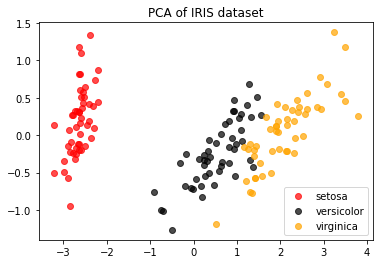

In [12]:
#4.可视化
colors = ['red', 'black', 'orange']
plt.figure()
for i in [0, 1, 2]:
    plt.scatter(x_dr[y == i, 0]
               ,x_dr[y == i, 1]
               ,alpha=.7
               ,c=colors[i]
               ,label=iris.target_names[i]
               )
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()

In [17]:
#5. 探索降维后的数据
pca.explained_variance_

array([4.22824171, 0.24267075])

In [18]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [19]:
pca.explained_variance_ratio_.sum()

0.977685206318795

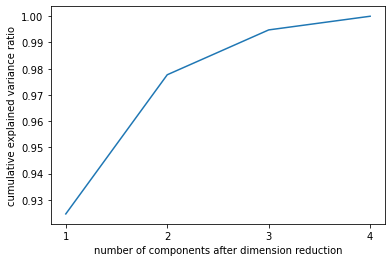

In [20]:
#7. 选择最好的n_components（累积可解释方差贡献率曲线）
import numpy as np
pca_line = PCA().fit(x)
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4])
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

In [22]:
#8.最大似然估计自选超参数
pca_mle = PCA(n_components="mle")
pca_mle = pca_mle.fit(x)
x_mle = pca_mle.transform(x)

x_mle[:10]

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272]])

In [23]:
pca.explained_variance_ratio_.sum()

0.977685206318795

In [24]:
#9.按信息量占比选超参数
pca_f = PCA(n_components=0.97,svd_solver="full")
pca_f = pca.fit(x)
x_f = pca_f.transform(x)

pca_f.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [25]:
PCA(2).fit(x).components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [26]:
PCA(2).fit(x).components_.shape

(2, 4)

# 重要接口components_运用

In [27]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [28]:
faces = fetch_lfw_people(min_faces_per_person=60)
faces.images.shape

(1348, 62, 47)

In [30]:
x = faces.data
x[:10]

array([[138.        , 135.66667   , 127.666664  , ...,   1.6666666 ,
          1.6666666 ,   0.33333334],
       [ 71.333336  ,  56.        ,  67.666664  , ..., 247.66667   ,
        243.        , 238.33333   ],
       [ 84.333336  ,  97.333336  ,  72.333336  , ..., 114.        ,
        194.33333   , 241.        ],
       ...,
       [ 83.        ,  88.333336  , 112.        , ..., 133.33333   ,
        146.66667   , 154.        ],
       [ 88.666664  ,  98.666664  , 113.666664  , ..., 252.        ,
        250.33333   , 230.        ],
       [ 26.        ,  30.        ,  52.333332  , ..., 217.33333   ,
        240.        , 246.        ]], dtype=float32)

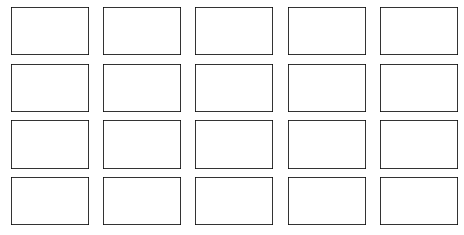

In [39]:
fig, axes = plt.subplots(4,5,
                        figsize=(8,4),
                        subplot_kw={"xticks":[],"yticks":[]})


In [32]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

In [33]:
axes.shape

(4, 5)

In [34]:
axes.flat

In [35]:
enumerate(axes.flat)

In [37]:
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i,:,:],
             cmap="gray")
    

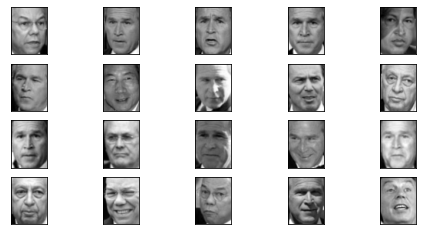

In [38]:
fig

In [42]:
pca = PCA(150).fit(x)
v = pca.components_
v.shape

(150, 2914)

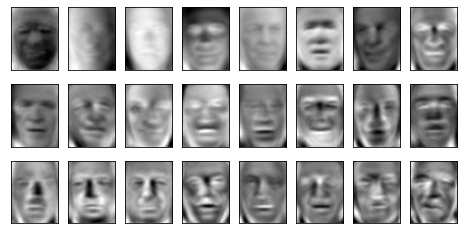

In [47]:
fig, axes = plt.subplots(3,8,figsize=(8,4), subplot_kw={"xticks":[],"yticks":[]})
for i,ax in enumerate(axes.flat):
    ax.imshow(v[i,:].reshape(62,47),cmap="gray")

# 重要接口inverse_transform运用

In [48]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [50]:
faces = fetch_lfw_people(min_faces_per_person=60)
faces.images.shape

(1348, 62, 47)

In [51]:
faces.data.shape

(1348, 2914)

In [52]:
X = faces.data

In [53]:
pca = PCA(150)
X_dr = pca.fit_transform(X)
X_dr.shape

(1348, 150)

In [54]:
X_inverse = pca.inverse_transform(X_dr)
X_inverse.shape


(1348, 2914)

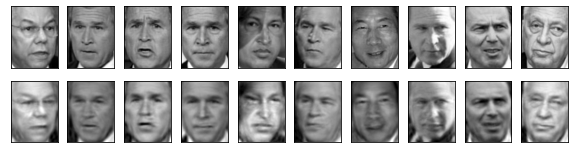

In [57]:
fig, ax = plt.subplots(2,10,figsize=(10,2.5)
                     ,subplot_kw={"xticks":[],"yticks":[]}
                     )

for i in range(10):
    ax[0,i].imshow(faces.images[i,:,:],cmap="binary_r")
    ax[1,i].imshow(X_inverse[i].reshape(62,47),cmap="binary_r")

# 2.案例：PCA噪声过滤

In [58]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [59]:
digits = load_digits()
digits.data.shape

(1797, 64)

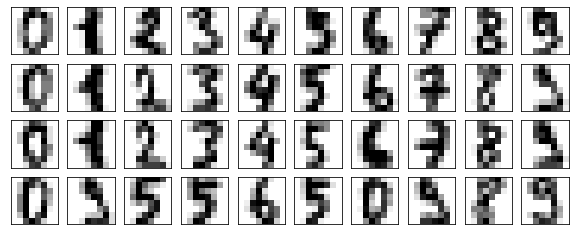

In [61]:
def plot_digits(data):
    fig, axes = plt.subplots(4,10,figsize=(10,4),
                            subplot_kw={"xticks":[],"yticks":[]})
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap="binary")
        
plot_digits(digits.data)

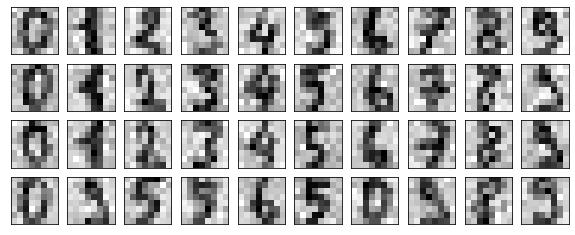

In [62]:
# 为数据加上噪音
np.random.RandomState(42)

noisy = np.random.normal(digits.data,2)
plot_digits(noisy)

In [63]:
pca = PCA(0.5).fit(noisy)
X_dr = pca.transform(noisy)
X_dr.shape

(1797, 6)

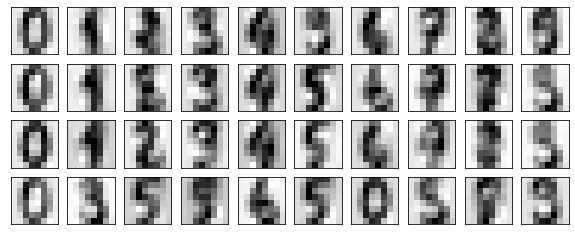

In [64]:
without_noise = pca.inverse_transform(X_dr)
plot_digits(without_noise)